# HKA Test and Homogeneity Test BFcol vs BFgam

## Homogeneity Test 

Under neutral evolution, we expect the amount of within- and between-species diversity to be correlated. If, however, selection events occur on the branch of a gene, we expect a reduction of polymorphic sites in one species only, compared to the levels of genetic variation and divergence in the other:

* A = number of polymorphic sites in the <i>An.coluzzii</i> samples;
* B = number of polymorphic sites in the <i>An.gambiae</i> samples;

* C = number of fixed differences between <i>An.coluzzii</i> and <i>An.gambiae</i> and <i>An.christyi</i> sequence;
* D = number of fixed differences between <i>An.gambiae</i> and <i>An.coluzzii</i>. and <i>An.christyi</i> sequence;

It was performed a homogeneity test for the null hypothesis A/C = B/D equivalent to A/B =C/D. Then was used a Pearson's chi-square test on the 2x2 contingency table. Because of LD, the resulting ‘P-values’ are not accurate and do not have the interpretation expected under the multinomial model underlying the assumption of the Pearson’s chi-square test. The issue resembles the well-known issues relating to HKA tests in population genetics, in which simulations under specific demographic models are needed to assign P-values. In the polar bear paper, they didn't attempt to present valid P-values based on demographic simulations, due to concerns regarding underlying parameters such as recombination rates.

Instead, they only provide ranked lists of genes and rely on enrichment analyses, and arguments regarding lack of symmetry between polar and brown bears, to provide statistical evidence for an effect reflecting what could be expected by chance in the absence of selection. To avoid misunderstandings regarding the interpretation of the ‘P-value’, they convert them to a score using -log10(P-value). They reported this score rather than the ‘P-value’ itself to avoid misunderstandings of the interpretation of this statistic

## HKA Test
The HKA test is based on the neutral theory of molecular evolution (Kimura 1983) which predicts that for a particular region of the genome, its rate of evolution is correlated with the levels of polymorphism within species. The test requires data from at least two regions of the genome both for an interspecific comparison and also data for the intraspecific polymorphism from at least one species.

Polymorphism levels depend on local mutation rates, measured from divergence values using an outgroup species. The HKA test is commonly used to verify this expectation and tests whether the decrease of polymorphism observed at a locus is due to positive selection and genetic hitchhiking.

The HKA test was performed comparing the ratio of A/C for each gene to the genome-wide average, computed as the sum of A and C values across all genes analyzed for <i>An.coluzzii</i> and the same on the ratio B/D for <i>An.gambiae</i> .


## Import modules and path for test

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import petl as etl
import anhima
import zarr
import allel
import itertools
import random
import seaborn as sns
import petlx.bio
import csv
import scipy
import intervaltree
from IPython.display import Image

/home/randomx/.conda/envs/pyenv1/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [57]:
call = zarr.open('/mnt/70D89269D8922CFA/Genomes/variation/ag1000g.phase2.ar1.pass.biallelic')
out_alleles = h5py.File('/mnt/70D89269D8922CFA/Genomes/extras/outgroup_alleles_phase2.h5')
ac_count = zarr.open('/mnt/70D89269D8922CFA/Genomes/extras/phase2_biallel_allele_count.zarr/')
out_count = zarr.open('/mnt/70D89269D8922CFA/Genomes/extras/outgroup_alleles_phase2.zarr/')
annotation = zarr.open('/mnt/70D89269D8922CFA/Genomes/variation/ag1000g.phase2.ar1.pass.biallelic_snpeff/')
samples = list(call['3L/samples'])
contigs = ['3L', '3R', '2R', '2L', 'X']
samples = [str(s) for s in call["3L"]["samples"][:]]
tbl_samples = etl.fromcsv('/mnt/70D89269D8922CFA/Genomes/meta/samples.meta.txt', delimiter='\t')

In [58]:
tbl_samples

ox_code,src_code,population,country,location,site,contributor,contact,year,m_s,sex,n_sequences,mean_coverage,ebi_sample_acc,latitude,longitude
AA0040-C,Twifo_Praso__E2,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,95033368,30.99,ERS311878,5.60858,-1.54926
AA0041-C,Twifo_Praso__H3,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,95843804,31.7,ERS311886,5.60858,-1.54926
AA0042-C,Takoradi_C7,GHcol,Ghana,Takoradi,Takoradi,David Weetman,David Weetman,2012,M,F,107420666,35.65,ERS311894,4.91217,-1.77397
AA0043-C,Takoradi_H8,GHcol,Ghana,Takoradi,Takoradi,David Weetman,David Weetman,2012,M,F,95993752,29.46,ERS311902,4.91217,-1.77397
AA0044-C,Takoradi_D10,GHcol,Ghana,Takoradi,Takoradi,David Weetman,David Weetman,2012,M,F,103044262,33.67,ERS311910,4.91217,-1.77397


----------------------

## Ag1000G Step

Take the 2 populations for the test, subsect the metadata

In [59]:
m = tbl_samples.select(lambda r: r.m_s == 'M' and r.population == 'BFcol').values('ox_code').list()
s = tbl_samples.select(lambda r: r.m_s == 'S' and r.population == 'BFgam').values('ox_code').list()
index_m = [samples.index(i) for i in m]
index_s = [samples.index(i) for i in s]

In [60]:
print('coluzzii samples:', len(index_m), '\n', 'gambiae samples:', len(index_s))

coluzzii samples: 75 
 gambiae samples: 92


Take from the annotation callset only the intergenic variants, upstream gene variants and downstream gene variants positions for each chromosome

In [61]:
ann = {chrom: annotation[chrom]['variants/ANN_Annotation'][:] for chrom in contigs}

In [62]:
sel = {chrom: ((ann[chrom] != b'intergenic_variant') & (ann[chrom] != b'upstream_gene_variant') &
(ann[chrom] != b'downstream_gene_variant')) for chrom in contigs}

In [63]:
del ann
#It will reduce the ammount of RAM used

Loading the genotype array for each chromosome:

In [64]:
ga = {chrom: allel.GenotypeChunkedArray(call[chrom]['calldata/GT']) for chrom in contigs}

Subset genotypes with my annotation selection:

In [65]:
is_bial_genes = {chrom: sel[chrom] for chrom in contigs}

In [66]:
ga = {chrom: ga[chrom].compress(is_bial_genes[chrom], axis=0) for chrom in contigs}

Creating 2 different genotypes arrays for each population:

In [67]:
# coluzzii
gm = {chrom: ga[chrom].take(index_m, axis=1) for chrom in contigs}

In [68]:
# gambiae. Because population is bigger than coluzzii I take randomly the same number of samples
random_index = random.sample(index_s, 75)
gs = {chrom: ga[chrom].take(random_index, axis=1) for chrom in contigs}

Performing the allele counts for each population and find their segregating sites:

In [69]:
acm = {chrom: gm[chrom].count_alleles() for chrom in contigs}
seg_m = {chrom: acm[chrom].count_segregating() for chrom in contigs}
is_seg_m = {chrom: acm[chrom].is_segregating() for chrom in contigs}

In [70]:
acs = {chrom: gs[chrom].count_alleles() for chrom in contigs}
seg_s = {chrom: acs[chrom].count_segregating() for chrom in contigs}
is_seg_s = {chrom: acs[chrom].is_segregating() for chrom in contigs}

In [71]:
for chrom in contigs:
    print('seg sites coluzii chrom %s:' % chrom, seg_m[chrom])

seg sites coluzii chrom 3L: 2278983
seg sites coluzii chrom 3R: 3201821
seg sites coluzii chrom 2R: 3312912
seg sites coluzii chrom 2L: 2748896
seg sites coluzii chrom X: 1108436


In [72]:
for chrom in contigs:
    print('seg sites gambiae chrom %s:' % chrom, seg_s[chrom])

seg sites gambiae chrom 3L: 2510590
seg sites gambiae chrom 3R: 3428742
seg sites gambiae chrom 2R: 4020649
seg sites gambiae chrom 2L: 2890597
seg sites gambiae chrom X: 1252673


Performing the allele frequency for each population:

In [73]:
#allele frequency
af_gambiae = {chrom: acs[chrom].to_frequencies() for chrom in contigs}

In [74]:
#allele frequency
af_coluzzii = {chrom: acm[chrom].to_frequencies() for chrom in contigs}

Take from my segregating sites only those alleles that are in my annotation selection:

In [76]:
pos = {chrom: call[chrom]['variants/POS'][:] for chrom in contigs}
pos_bial_genes = {chrom: np.compress(is_bial_genes[chrom], pos[chrom]) for chrom in contigs}

In [77]:
segreg_c = {chrom: np.compress(is_seg_m[chrom], pos_bial_genes[chrom]) for chrom in contigs}
segreg_g = {chrom: np.compress(is_seg_s[chrom], pos_bial_genes[chrom]) for chrom in contigs}

-----------------------------

## Outgroup step

In this section with the outgroup polariztion I take only the variants that are present in my outgroup to find private fixed alleles for my 2 populations:

In [ ]:
outgroups = ['epir', 'chri', 'meru', 'mela']

In [79]:
# af biallelic in genes
af_out = {}
for out in outgroups:
    af_out[out] = {}
    for chrom in contigs:
        allele_count = out_count[chrom][out][:]
        allele_count_bial_genes = np.compress(is_bial_genes[chrom], allele_count, axis=0)
        allele_number = allele_count_bial_genes.sum(axis=1)[:, np.newaxis]
        af_out[out][chrom] = np.where(allele_number > 0, allele_count_bial_genes / allele_number, 0)

/home/randomx/.conda/envs/pyenv1/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [80]:
#filter bial in genes
out_al = {}
for chrom in contigs:
    out_al[chrom] = {}
    for out in outgroups:
        out_al[chrom][out] = out_alleles[chrom][out][:]
        out_al[chrom][out] = np.compress(is_bial_genes[chrom], out_al[chrom][out])

In [81]:
assert out_al[chrom][out].shape[0] == af_out[out][chrom].shape[0]

In [82]:
def consensus_aa(chrom, out_alleles, outgroups):
    aa = None
    for out in outgroups:
        if aa is None:
            aa = out_alleles[chrom][out]
        else:
            loc_consensus = aa == out_alleles[chrom][out]
            aa[~loc_consensus] = b'.'
    return aa

In [83]:
aa = {chrom: consensus_aa(chrom, out_al, ['chri']) for chrom in contigs}

In [84]:
# load ag1000g alleles
ref = {chrom: call[chrom]['variants/REF'][:] for chrom in contigs}
alt = {chrom: call[chrom]['variants/ALT'][:] for chrom in contigs}

In [85]:
# filter for bial in genes
ref_bial_genes = {chrom: np.compress(is_bial_genes[chrom], ref[chrom]) for chrom in contigs}
alt_bial_genes = {chrom: np.compress(is_bial_genes[chrom], alt[chrom]) for chrom in contigs}

In [86]:
bool_aa_match = {chrom: (aa[chrom] != b'.') & ((aa[chrom] == ref_bial_genes[chrom]) | (aa[chrom] == alt_bial_genes[chrom])) for chrom in contigs}

In [87]:
for chrom in contigs:
    ref[chrom] = ref_bial_genes[chrom].compress(bool_aa_match[chrom], axis=0)
    alt[chrom] = alt_bial_genes[chrom].compress(bool_aa_match[chrom], axis=0)
    af_coluzzii[chrom] =  af_coluzzii[chrom].compress(bool_aa_match[chrom], axis=0)
    af_gambiae[chrom] = af_gambiae[chrom].compress(bool_aa_match[chrom], axis=0)
    aa[chrom] = aa[chrom].compress(bool_aa_match[chrom], axis=0)
    pos_bial_genes[chrom] = pos_bial_genes[chrom].compress(bool_aa_match[chrom], axis=0)
    out = 'chri'
    af_out[out][chrom] = af_out[out][chrom].compress(bool_aa_match[chrom], axis=0)

In [88]:
bool_no_fixed = {chrom:(((af_out['chri'][chrom][:,1]  != 0) & (af_out['chri'][chrom][:,1] != 1)) 
                        ) for chrom in contigs}

In [89]:
af_gambiae_novar_out = {chrom: np.compress(~bool_no_fixed[chrom], af_gambiae[chrom], axis=0) for chrom in contigs}
af_coluzzii_novar_out = {chrom: np.compress(~bool_no_fixed[chrom], af_coluzzii[chrom], axis=0) for chrom in contigs}
af_novar_out = {}
for out in ['chri']:
        af_novar_out[out] = {chrom: np.compress(~bool_no_fixed[chrom], af_out[out][chrom], axis=0) for chrom in contigs}     

In [90]:
pos_bial_genes = {chrom: np.compress(~bool_no_fixed[chrom], pos_bial_genes[chrom]) for chrom in contigs}

In [91]:
len(bool_no_fixed['2L'])*2

11799372

In [92]:
len(pos_bial_genes['2L'])

5899686

In [93]:
def find_private_fixed_derived_gambiae(pos, af_gambiae, af_coluzzii, af_out, DAF=0.9):
    fixed = {}
    for chrom in contigs:
        cond = ((abs(af_gambiae[chrom][:, 0] - af_coluzzii[chrom][:, 0]) >= DAF) & 
                (abs(af_coluzzii[chrom][:, 0] - af_novar_out['chri'][chrom][:, 0]) <= (1 - DAF)))
        fixed[chrom] = np.compress(cond, pos[chrom])
    return fixed
                                   
                        

In [94]:
def find_private_fixed_derived_coluzzii(pos, af_gambiae, af_coluzzii, af_out, DAF=0.9):
    fixed = {}
    for chrom in contigs:
        cond = ((abs(af_gambiae[chrom][:, 0] - af_coluzzii[chrom][:, 0]) >= DAF) & 
                (abs(af_gambiae[chrom][:, 0] - af_novar_out['chri'][chrom][:, 0]) <= (1 - DAF)))
        fixed[chrom] = np.compress(cond, pos[chrom])
    return fixed
                 

In [95]:
chrom = 'X'
assert(af_gambiae_novar_out[chrom].shape[0] == af_gambiae_novar_out[chrom].shape[0] == pos_bial_genes[chrom].shape[0])

## Sanity Check

In [96]:
fixed_g = find_private_fixed_derived_gambiae(pos_bial_genes, af_gambiae_novar_out, af_coluzzii_novar_out, af_novar_out)
fixed_g['3L']

array([   82544,   138420,   138857,   139705,   168829,   296109,
         304874,   305123,   398426,   414547,  9205129,  9505086,
        9505172,  9505188,  9505301, 10233123, 10233176, 10233180,
       10274453, 10274892, 10275447, 10276680, 10276868, 10276878,
       10276935, 10276969, 10276974, 10387477, 10433175, 10762090,
       10883390, 10883931, 10885668, 10885781, 10886677, 10904449,
       10905285, 10905431, 10905456, 10913315, 10913523, 10954013,
       11592016, 11592984, 33285114, 33285780], dtype=int32)

In [97]:
fixed_c = find_private_fixed_derived_coluzzii(pos_bial_genes, af_gambiae_novar_out, af_coluzzii_novar_out, af_novar_out)
fixed_c['3L']

array([   66609,    80272,    81082,    82766,   139762,   139768,
         296897,   303760,   304422,   304440,   305059,   377123,
         413508,   413550,   413551,   413944,  9251399,  9368190,
        9504837,  9509059, 10243325, 10243327, 10243798, 10385594,
       10386086, 10815293, 10815812, 10862596, 10882689, 10885503,
       10885515, 10904429, 10904448, 10905461, 10912700, 10913305,
       10913361, 10913397, 11167839, 11241338, 11591221, 11593158,
       11593718, 33285040, 33285838], dtype=int32)

In [98]:
loc_3L = np.in1d(pos_bial_genes['3L'], fixed_c['3L'])
np.compress(loc_3L, af_coluzzii_novar_out['3L'], axis=0)[:10]

array([[ 1.        ,  0.        ],
       [ 0.99333333,  0.00666667],
       [ 1.        ,  0.        ],
       [ 0.99333333,  0.00666667],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 0.        ,  1.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ]])

In [99]:
np.compress(loc_3L, af_gambiae_novar_out['3L'], axis=0)[:10]

array([[ 0.05333333,  0.94666667],
       [ 0.05333333,  0.94666667],
       [ 0.05333333,  0.94666667],
       [ 0.05333333,  0.94666667],
       [ 0.05333333,  0.94666667],
       [ 0.05333333,  0.94666667],
       [ 0.94666667,  0.05333333],
       [ 0.05333333,  0.94666667],
       [ 0.05333333,  0.94666667],
       [ 0.05333333,  0.94666667]])

In [100]:
np.compress(loc_3L, af_novar_out['chri']['3L'], axis=0)[:10,:2]

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]])

-----------------------------

## Perform the statistic

In this part of the notebook I load the PEST gene annotation and i create 2 tables where there are the genes respect my fixed allels for my two populations:

In [101]:
def identify_variants_per_gene(chrom, pos, species):
    gff = petlx.bio.gff3.fromgff3('/mnt/70D89269D8922CFA/Genomes/genome/Anopheles-gambiae-PEST_BASEFEATURES_AgamP4.2.gff3.gz')
    gff_chrom = gff.select(lambda r: r.seqid == '%s' % chrom and r.end > r.start and r.type == 'gene')
    array = np.core.records.fromarrays([pos[chrom]], names= 'pos')
    tbl_pos = etl.fromarray(array).convert('pos', int)
    interval_join = etl.intervaljoin(tbl_pos, gff_chrom, lstart='pos', lstop='pos', rstart='start', rstop='end', include_stop=True).sort('pos')
    genes_names = [x["ID"] for x in interval_join['attributes']]
    interval_join = interval_join.addcolumn('genes', genes_names)
    return interval_join

In [102]:
identify_fixex_coluzzii = {chrom: identify_variants_per_gene(chrom, fixed_c, 'coluzzii_segreg') for chrom in contigs}

In [103]:
identify_fixex_gambiae = {chrom: identify_variants_per_gene(chrom, fixed_g, 'gambiae_segreg') for chrom in contigs}

Now i count variants for fixed and segregating alleles:

In [104]:
def count_variants_per_gene(chrom, pos, species):
    gff = petlx.bio.gff3.fromgff3('/mnt/70D89269D8922CFA/Genomes/genome/Anopheles-gambiae-PEST_BASEFEATURES_AgamP4.2.gff3.gz')
    gff_chrom = gff.select(lambda r: r.seqid == '%s' % chrom and r.end > r.start and r.type == 'gene')
    array = np.core.records.fromarrays([pos[chrom]], names= 'pos')
    tbl_pos = etl.fromarray(array).convert('pos', int)
    interval_join = etl.intervaljoin(tbl_pos, gff_chrom, lstart='pos', lstop='pos', rstart='start', rstop='end', include_stop=True).sort('pos')
    genes_names = [x["ID"] for x in interval_join['attributes']]
    interval_join = interval_join.addcolumn('genes', genes_names)
    aggregate = interval_join.aggregate('genes', len).rename('value', species)
    return aggregate

In [105]:
#A
count_segreg_coluzzii = {chrom: count_variants_per_gene(chrom, segreg_c, 'coluzzii_segreg') for chrom in contigs}

In [108]:
#B
count_segreg_gambiae = {chrom: count_variants_per_gene(chrom, segreg_g, 'gambiae_segreg') for chrom in contigs}

In [109]:
#C
count_fixed_coluzzii = {chrom: count_variants_per_gene(chrom, fixed_c, 'coluzzii_fixed') for chrom in contigs}

In [110]:
#D
count_fixed_gambiae = {chrom: count_variants_per_gene(chrom, fixed_g, 'gambiae_fixed') for chrom in contigs}

In [111]:
# join (A and C) - (B and D)
joi_seg_fix_coluzzii = {chrom: count_fixed_coluzzii[chrom].join(count_segreg_coluzzii[chrom], key='genes') for chrom in contigs}
joi_seg_fix_gambiae  = {chrom: count_fixed_gambiae[chrom].join(count_segreg_gambiae[chrom], key='genes') for chrom in contigs}

In [112]:
# calculate the ratio for each gene
joi_seg_fix_coluzzii= {chrom: joi_seg_fix_coluzzii[chrom].addfield('A/C (i.e.seg/fix)', lambda r: r.coluzzii_segreg / r.coluzzii_fixed)
                       for chrom in contigs}
joi_seg_fix_gambiae= {chrom: joi_seg_fix_gambiae[chrom].addfield('B/D (i.e.seg/fix)', lambda r: r.gambiae_segreg / r.gambiae_fixed)
                       for chrom in contigs}
joi_seg_fix_coluzzii['2R'].display()
joi_seg_fix_gambiae['2R'].display()

genes,coluzzii_fixed,coluzzii_segreg,A/C (i.e.seg/fix)
AGAP001658,1,789,789.0
AGAP001660,1,2686,2686.0
AGAP001674,6,2322,387.0
AGAP001683,31,13434,433.35483870967744
AGAP001684,2,383,191.5


genes,gambiae_fixed,gambiae_segreg,B/D (i.e.seg/fix)
AGAP001569,1,203,203.0
AGAP001674,1,3209,3209.0
AGAP001683,19,17157,903.0
AGAP001690,1,4164,4164.0
AGAP001824,12,10497,874.75


In [113]:
etl.rowlengths(joi_seg_fix_gambiae['X'])

length,count
4,100


In [114]:
# calculate ABCD genome wide (in all genes with both fixed and segregating variants)
A_geno_wide_coluzzii = sum([joi_seg_fix_coluzzii[chrom].stats('coluzzii_segreg')[2] for chrom in contigs])
C_geno_wide_coluzzii = sum([joi_seg_fix_coluzzii[chrom].stats('coluzzii_fixed')[2] for chrom in contigs])
B_geno_wide_gambiae = sum([joi_seg_fix_gambiae[chrom].stats('gambiae_segreg')[2] for chrom in contigs])
D_geno_wide_gambiae = sum([joi_seg_fix_gambiae[chrom].stats('gambiae_fixed')[2] for chrom in contigs])

In [115]:
# calculate A/C and B/D genome wide
AC_geno_wide = A_geno_wide_coluzzii / C_geno_wide_coluzzii
print('\n', 'A genome wide: ', A_geno_wide_coluzzii, '\n', 'C genome wide: ', C_geno_wide_coluzzii, '\n', 'A/C genome wide: ', AC_geno_wide)
BD_geno_wide = B_geno_wide_gambiae / D_geno_wide_gambiae
print('\n', 'B genome wide: ', B_geno_wide_gambiae, '\n', 'D genome wide: ', D_geno_wide_gambiae, '\n', 'B/D genome wide: ', BD_geno_wide)


 A genome wide:  181087.0 
 C genome wide:  662.0 
 A/C genome wide:  273.5453172205438

 B genome wide:  186177.0 
 D genome wide:  585.0 
 B/D genome wide:  318.25128205128203


In [116]:
def get_conti(chrom, species, joi_seg_fix, seg_geno_wide, fixed_geno_wide):
    conti_tbl = {}
    for rec in joi_seg_fix[chrom].records():
        if species == 'coluzzii':
            A = rec.coluzzii_segreg
            C = rec.coluzzii_fixed
            gene = rec.genes
            conti_tbl[gene] = [[A, C], [seg_geno_wide, fixed_geno_wide]]
        if species == 'gambiae':
            B = rec.gambiae_segreg
            D = rec.gambiae_fixed
            gene = rec.genes
            conti_tbl[gene] = [[B, D], [seg_geno_wide, fixed_geno_wide]]
    return conti_tbl

In [117]:
def perform_pear_chi(species):
    pear_chi = {}
    conti_tbl = {}
    for chrom in contigs:
        if species == 'coluzzii':
            conti_tbl[chrom] = get_conti(chrom, 'coluzzii', joi_seg_fix_coluzzii, A_geno_wide_coluzzii, C_geno_wide_coluzzii)
        if species == 'gambiae':
            conti_tbl[chrom] = get_conti(chrom, 'gambiae', joi_seg_fix_gambiae, B_geno_wide_gambiae, D_geno_wide_gambiae)
        pear_chi[chrom] = {}
        for k in conti_tbl[chrom]:
            pear_chi[chrom][k] = scipy.stats.chi2_contingency(conti_tbl[chrom][k])
    return pear_chi

In [118]:
pear_chi_coluzzii = perform_pear_chi('coluzzii')
pear_chi_gambiae = perform_pear_chi('gambiae')

In [119]:
conti_tbl_coluzzii = {}
conti_tbl_gambiae = {}
for chrom in contigs:
    conti_tbl_gambiae[chrom] = get_conti(chrom, 'gambiae', joi_seg_fix_gambiae, B_geno_wide_gambiae, D_geno_wide_gambiae)
    conti_tbl_coluzzii[chrom] = get_conti(chrom, 'coluzzii', joi_seg_fix_coluzzii, A_geno_wide_coluzzii, C_geno_wide_coluzzii)

In [120]:
with open('/home/randomx/hka/gambiae_hka_summary_beta.tab', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter='\t')
    header = ['chrom', 'gene', 'segreg_g', 'pri_der_fix_g', 'score_g']
    writer.writerow(header)
    for chrom in contigs:
        for gene, value in pear_chi_gambiae[chrom].items():
            row = [chrom, gene, conti_tbl_gambiae[chrom][gene][0][0], conti_tbl_gambiae[chrom][gene][0][1], -(np.log10((value[1])))]
            writer.writerow(row)


In [121]:
with open('/home/randomx/hka/coluzzii_hka_summary.tab_beta.tab', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter='\t')
    header = ['chrom', 'gene', 'segreg_c', 'pri_der_fix_c', 'score_c']
    writer.writerow(header)
    for chrom in contigs:
        for gene, value in pear_chi_coluzzii[chrom].items():
            row = [chrom, gene, conti_tbl_coluzzii[chrom][gene][0][0], conti_tbl_coluzzii[chrom][gene][0][1], -(np.log10((value[1])))]
            writer.writerow(row)


------------------------------------------------------------

In [122]:
hka_gambiae = etl.fromtsv('/home/randomx/hka/gambiae_hka_summary_beta.tab', delimiter='\t')
hka_gambiae.convert('score_g', float).select(lambda rec: rec.score_g >= 1.3).displayall()

chrom,gene,segreg_g,pri_der_fix_g,score_g
3L,AGAP010316,15,1,1.35317292047
3L,AGAP010313,173,3,2.05758803001
3R,AGAP010302,54,2,2.8047957226
3R,AGAP010294,96,3,4.06761372281
3R,AGAP007737,120,6,15.2508298376
3R,AGAP010290,184,4,3.81501240921
3R,AGAP007732,633,31,81.7214281888
3R,AGAP007736,2299,48,45.3891959405
3R,AGAP010184,4559,3,2.3568051817
3R,AGAP010286,409,6,3.61505643975


In [123]:
hka_coluzzii = etl.fromtsv('/home/randomx/hka/coluzzii_hka_summary.tab_beta.tab', delimiter='\t')
hka_coluzzii.displayall()

chrom,gene,segreg_c,pri_der_fix_c,score_c
3L,AGAP010314,120,1,0.0318994500595
3L,AGAP010310,118,3,2.71337336011
3L,AGAP010313,112,5,9.32563208242
3L,AGAP010742,1949,1,1.44959707401
3L,AGAP010788,1306,2,0.522601199367
3L,AGAP010317,31,4,20.4043809663
3R,AGAP009801,733,1,0.324928040885
3R,AGAP007761,727,4,0.215314722705
3R,AGAP010147,844,5,0.371496633581
3R,AGAP010297,61,2,2.09782783164


In [124]:
hka_gambiae.convert('score_g', float).select(lambda r: (r.chrom == 'X') & (r.score_g >= 1.3)).rowlengths() 

length,count
5,56


In [125]:
hka_coluzzii.convert('score_c', float).select(lambda r: (r.chrom == 'X') & (r.score_c >= 1.3)).rowlengths() 

length,count
5,52


-----------------------------

## Disruptive selection
Also called diversifying selection, describes changes in population genetics in which extreme values for a trait are favored over intermediate values. In this case, the variance of the trait increases and the population is divided into two distinct groups. In this more individuals acquire peripheral character value at both ends of the distribution curve.



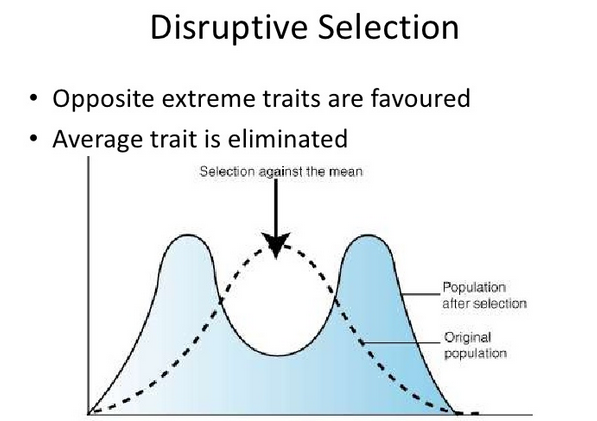

In [2]:
Image(filename='/home/randomx/Immagini/disruptive_sel.png')

In [126]:
disr_select = (hka_coluzzii.join(hka_gambiae, key=['chrom', 'gene'])
    .convert(['score_c', 'score_g'], float)
    #.select(lambda r: (r.score_g >= 10) & (r.score_c >= 10))
    .addfield('score_tot', lambda r: r.score_c + r.score_g)
    .sort('score_tot', reverse=True)
    )
disr_select.tocsv('/home/randomx/hka/putative_directional_selection_beta.tab', delimiter='\t')
disr_select.display(10)

chrom,gene,segreg_c,pri_der_fix_c,score_c,segreg_g,pri_der_fix_g,score_g,score_tot
3R,AGAP007732,525,25,54.3486933436,633,31,81.7214281888,136.0701215324
X,AGAP013341,37,10,110.595539115,33,4,22.4765841881,133.0721233031
X,AGAP001035,67,13,110.786262569,109,5,11.3266754184,122.1129379874
X,AGAP001076,119,10,38.4766077275,78,10,67.4529169256,105.9295246531
X,AGAP001023,177,6,8.44952666879,281,19,70.5842294148,79.03375608359
3R,AGAP007736,1966,29,13.9424575794,2299,48,45.3891959405,59.3316535199
X,AGAP001026,32,5,31.7591254698,39,4,19.2554122217,51.014537691499996
3R,AGAP007731,146,10,31.314540398,197,8,16.7709893075,48.085529705499994
X,AGAP001037,17,4,34.3866942892,30,2,5.00649924533,39.39319353453
X,AGAP000819,18,4,32.8000250721,38,2,3.98622367513,36.78624874723


In [127]:
disr_select = (hka_coluzzii.join(hka_gambiae, key=['chrom', 'gene'])
    .convert(['score_c', 'score_g'], float)
    .select(lambda r: (r.score_g >= 10) & (r.score_c >= 10))
    .addfield('score_tot', lambda r: r.score_c + r.score_g)
    .sort('score_tot', reverse=True))
disr_select.tocsv('/home/randomx/hka/putative_directional_selection_beta.tab', delimiter='\t')
disr_select.displayall()

chrom,gene,segreg_c,pri_der_fix_c,score_c,segreg_g,pri_der_fix_g,score_g,score_tot
3R,AGAP007732,525,25,54.3486933436,633,31,81.7214281888,136.0701215324
X,AGAP013341,37,10,110.595539115,33,4,22.4765841881,133.0721233031
X,AGAP001035,67,13,110.786262569,109,5,11.3266754184,122.1129379874
X,AGAP001076,119,10,38.4766077275,78,10,67.4529169256,105.9295246531
3R,AGAP007736,1966,29,13.9424575794,2299,48,45.3891959405,59.3316535199
X,AGAP001026,32,5,31.7591254698,39,4,19.2554122217,51.014537691499996
3R,AGAP007731,146,10,31.314540398,197,8,16.7709893075,48.085529705499994
2L,AGAP006634,14439,2,11.2952008169,19773,1,13.7886692343,25.0838700512


- AGAP007732 -> Solute Carrier Family 17
- AGAP013341 -> Specimen specific marker present in Neafsey 2010 and Aboagye-Antwi et. al 2015
- AGAP001035 -> Rapamycin-insensitive companion of mTOR
- AGAP001076 -> CYP4G16 (Cytochrome P450 associated with insecticide resistance catalyzes cuticular hydrocarbon production in Anopheles gambiae)
- AGAP007736 -> Selection Atlas H12 Gabon (https://malariagen.github.io/agam-selection-atlas/0.1-alpha2/signal/H12/GAS/3/2/index.html)
- AGAP001026 -> Carboxypeptidase A  (Neafsey 2010)
- AGAP006634 -> Semaphorin-2A (Also present in Selection Atlas XPEHH BFM/BFS https://malariagen.github.io/agam-selection-atlas/0.1-alpha3/signal/XPEHH/BFM.BFS/2/3/index.html)

In the early version on phase1 genes found with score_c and score_g >= 10:

- AGAP001023 myofilin muscle protein involved in flight (before: <b>score_c = 15.96 | score_g = 14.34</b> ----- now: <b>score_c = 8.84 | score_g = 70.58</b>)
- AGAP001033 Protein mab-21-like (before: <b>score_c = 10.60 | score_g = 15.83</b> ----- now: <b>score_c = 8.63 | score_g = 11.26 </b>)
- AGAP001039 CYP307A1 (before: <b>score_c = 34.41 | score_g = 31.40 </b> ----- now: <b>score_c = 0.18 | score_g = 1.15 </b>)
- AGAP001050 chondroitin polymerizing factor Tripet (before: <b>score_c = 18.23 | score_g = 11.86 </b> ----- now: <b>score_c = 5.52 | score_g = 24.51 </b>)
- AGAP001053 The Coevolution of Insect Muscle TpnT and TpnI Gene Isoforms  (before: <b>score_c = 31.34 | score_g = 70.45 </b> ----- now: <b>score_c = 1.85 | score_g = 8.79 </b>)



## Genes which experienced private selection
Based on the hka-test score (1.3) here we indentify genes that there are only in one specimen


In [ ]:
hka_gambiae_coluzzii = hka_coluzzii.outerjoin(hka_gambiae, key=['chrom', 'gene']).convert(['score_g', 'score_c'], float)

In [128]:
priv_sel_coluzzii =  (hka_gambiae_coluzzii.selectne('score_c', None).convert('score_g', {None: 0})
                     .select(lambda r: r.score_c >= 1.3 and r.score_g <= 1.3).sort('score_c', reverse=True))
priv_sel_coluzzii.displayall()

chrom,gene,segreg_c,pri_der_fix_c,score_c,segreg_g,pri_der_fix_g,score_g
X,AGAP000822,6,3,41.5211699388,None,None,0
X,AGAP013181,30,5,33.6274701266,None,None,0
3R,AGAP010305,11,3,26.6540217572,None,None,0
3L,AGAP010317,31,4,20.4043809663,27,1,0.78610368567
X,AGAP001031,16,3,19.5918952584,20,1,1.04451282125
X,AGAP001044,7,2,15.2818088608,24,1,0.880696553589
3R,AGAP010304,56,4,11.6251989737,None,None,0
X,AGAP000829,134,5,7.67243352854,322,1,0.203061479037
X,AGAP000937,17,2,7.27442100213,20,1,1.04451282125
X,AGAP001038,19,2,6.58071896023,25,1,0.846972102628


AGAP010303 -> Autophagy-related protein 7, Found on PBS with score above 0.4 | Also present in selection Atlas (https://malariagen.github.io/agam-selection-atlas/0.1-alpha2/signal/H12/BFM/3/3/index.html)

In [129]:
priv_sel_gambiae =  (hka_gambiae_coluzzii.selectne('score_g', None).convert('score_c', {None: 0})
                     .select(lambda r: r.score_g >= 1.3 and r.score_c <= 1.3).sort('score_g', reverse=True))
priv_sel_gambiae.displayall()

chrom,gene,segreg_c,pri_der_fix_c,score_c,segreg_g,pri_der_fix_g,score_g
X,AGAP000975,None,None,0,34,5,35.0817572797
X,AGAP001041,18,1,0.994879324639,17,3,21.64108628
X,AGAP001051,None,None,0,7,2,17.7271161896
X,AGAP000949,None,None,0,47,4,16.1348914193
X,AGAP001083,38,1,0.466121033299,25,3,15.3932646501
X,AGAP001042,None,None,0,9,2,14.5339980673
X,AGAP001047,30,1,0.603908216676,45,3,8.84823444318
3R,AGAP010289,21,1,0.861228932036,18,2,8.02813833498
X,AGAP001068,88,1,0.120595912514,96,4,7.87854574963
X,AGAP000837,145,1,0.0155836173615,242,6,7.03012953991


AGAP010286 -> Found in PBS with score above 0.4 (Present also in Neafsey 2010)

## Plot genome wide HKA
Representing that genes along the chromosome

In [130]:
def center_pos(r):
    start = r.start
    end = r.end
    center = ((end - start) / 2) + start
    return int(center)

In [131]:
tbl_genes  = (etl
    .fromgff3('/mnt/70D89269D8922CFA/Genomes/genome/Anopheles-gambiae-PEST_BASEFEATURES_AgamP4.2.gff3.gz')
    .unpackdict('attributes')
    .cut(2,3,4,9)
    .select(lambda rec: rec.type == 'gene')
    .rename('ID', 'gene')
    .addfield('center_gene', center_pos)
)
tbl_genes.display(10)

type,start,end,gene,center_gene
gene,157348,186936,AGAP004677,172142
gene,203779,205293,AGAP004678,204536
gene,207894,210460,AGAP004679,209177
gene,271285,271815,AGAP004680,271550
gene,358329,359280,AGAP004681,358804
gene,433503,461627,AGAP004682,447565
gene,485698,488369,AGAP004683,487033
gene,493039,493543,AGAP004684,493291
gene,493579,497632,AGAP004685,495605
gene,742004,747057,AGAP004686,744530


In [132]:
pos_hka_gambiae = hka_gambiae.join(tbl_genes, key='gene')
pos_hka_coluzzii = hka_coluzzii.join(tbl_genes, key='gene')

In [133]:
def plot_genome_hka(species, chrom):
    if species == 'gambiae':   
        tbl_plot = pos_hka_gambiae.select(lambda r: r.chrom == chrom)
        y = tbl_plot['score_g'].list()
    if species == 'coluzzii':
        tbl_plot = pos_hka_coluzzii.select(lambda r: r.chrom == chrom)
        y = tbl_plot['score_c'].list()
    fig, ax = plt.subplots(figsize=(15,2))
    x = tbl_plot['center_gene'].list()
    
    ax.set_ylabel('HKA test score', fontsize=14)
    ax.set_xlabel('Positions', fontsize=14)
    ax.set_title('An. gambiae chrom: %s' % chrom, fontsize=14)
    ax.plot(x, y, 'or')
    len_chrom = {'X': 244e5, '3R': 532e5, '3L': 42e6, '2R': 616e5, '2L':493e5}
    ax.set_xlim(0, len_chrom[chrom])
    if chrom == 'X':
        ax.set_ylim(0, 80)
    else:
        ax.set_ylim(0, 40)
    sns.despine(offset=10)

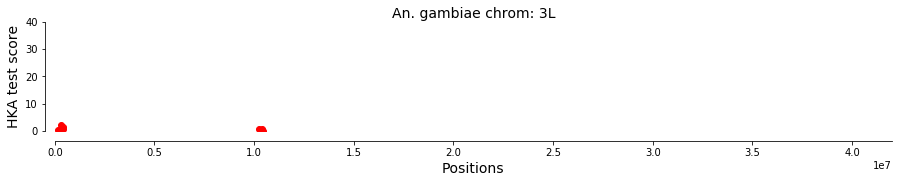

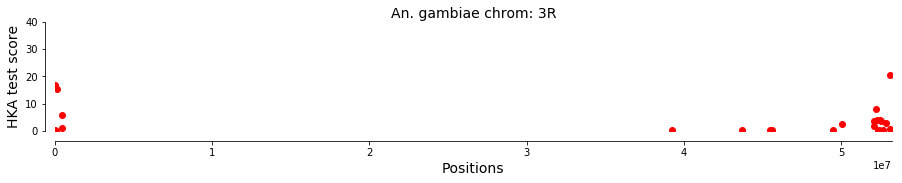

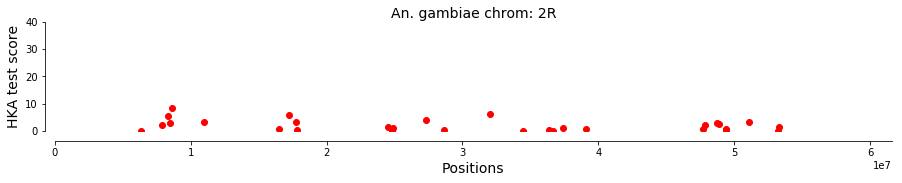

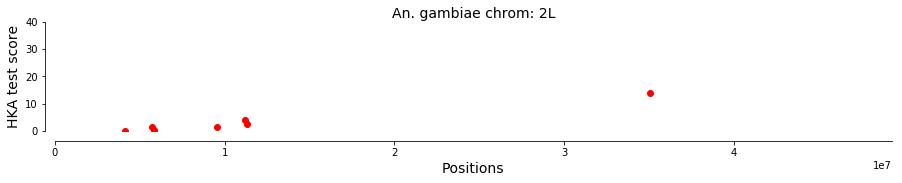

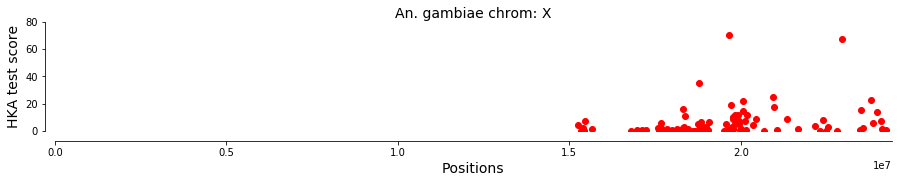

In [134]:
for chrom in contigs:
    plot_genome_hka('gambiae', chrom)

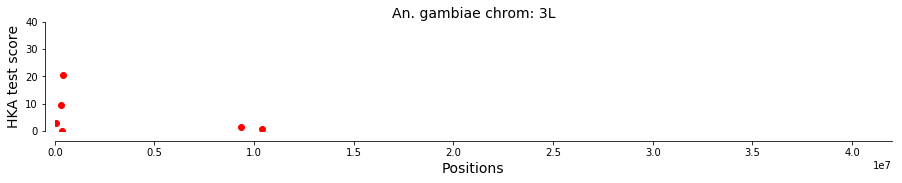

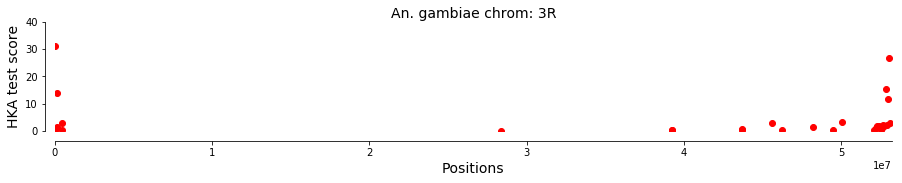

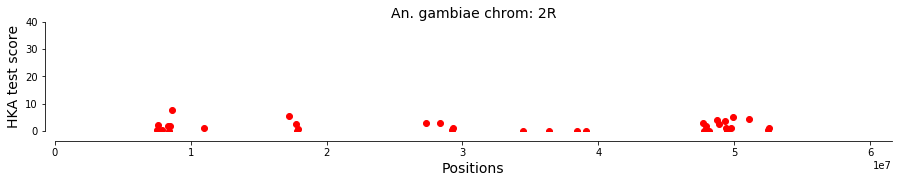

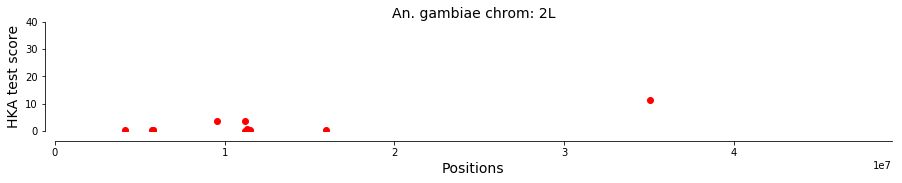

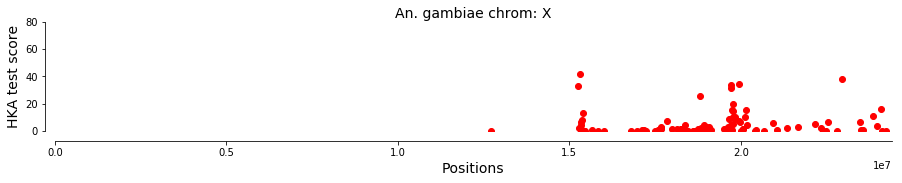

In [135]:
for chrom in contigs:
    plot_genome_hka('coluzzii', chrom)

## Plot seg fixed An coluzzii

Plot of fixed sites cs segratating sites.

Total plot:

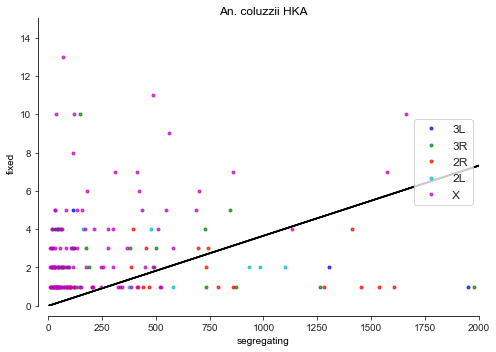

In [136]:
fig, ax = plt.subplots(figsize=(7,5))
for num, chrom in enumerate(contigs):
    
    colour = {0:'b', 1:'g', 2:'r', 3: 'c', 4:'m'}
    conti_tbl = get_conti(chrom, 'coluzzii', joi_seg_fix_coluzzii, A_geno_wide_coluzzii, C_geno_wide_coluzzii)
    segreg = [i[0][0] for i in conti_tbl.values()]
    fixed = [i[0][1] for i in conti_tbl.values()]
    ax.plot(segreg, fixed,  colour[num] + '.', alpha=0.7, label=chrom)
    ax.plot([0, A_geno_wide_coluzzii], [0, C_geno_wide_coluzzii], 'k')
    ax.set_xlabel('segregating')
    ax.set_xlim(0,2000)
    ax.set_ylim(0,15)
    ax.set_title('An. coluzzii HKA')
    ax.set_ylabel('fixed')
    sns.set_style('ticks')
    ax.legend(loc=7, fontsize='large')
    sns.despine(offset=10)

fig.tight_layout()

Per chromosome plot:

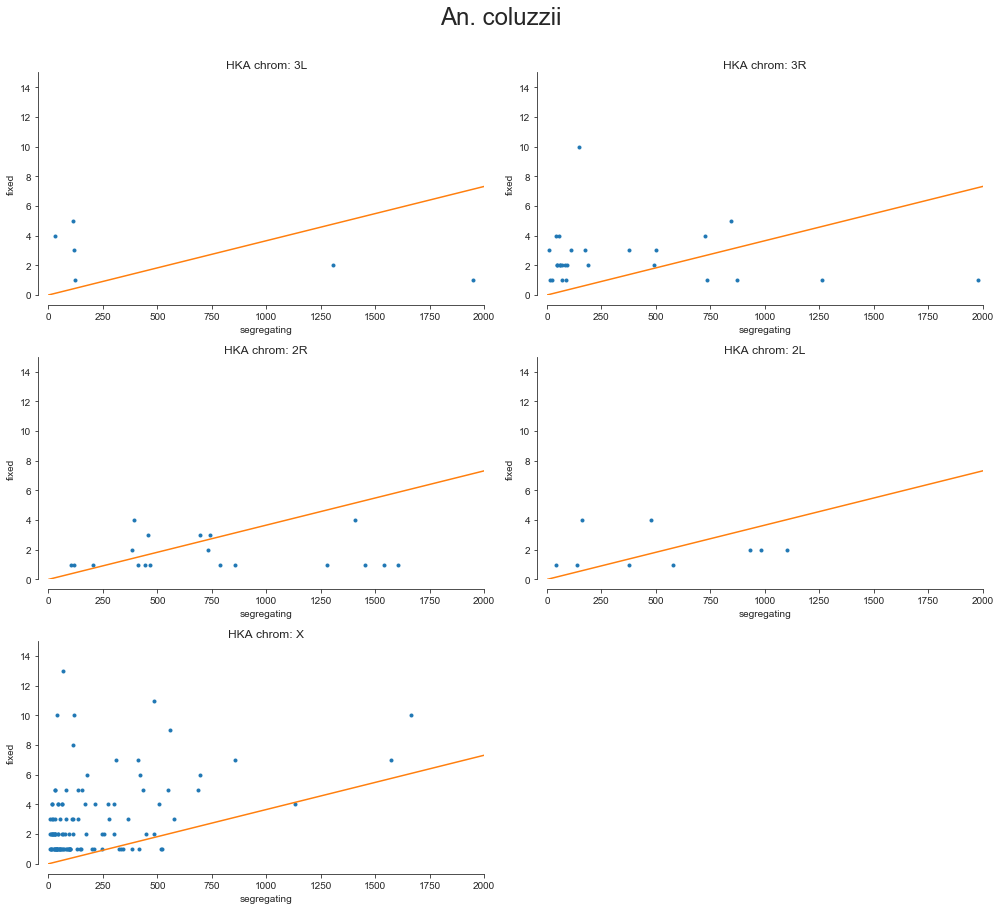

In [137]:
fig = plt.figure(figsize=(14, 12))
for num, chrom in enumerate(contigs):
    
    ax = plt.subplot(3,2,num+1)
    conti_tbl = get_conti(chrom, 'coluzzii', joi_seg_fix_coluzzii, A_geno_wide_coluzzii, C_geno_wide_coluzzii)
    segreg = [i[0][0] for i in conti_tbl.values()]
    fixed = [i[0][1] for i in conti_tbl.values()]
    ax.plot(segreg, fixed, '.')
    ax.plot([0, A_geno_wide_coluzzii], [0, C_geno_wide_coluzzii])
    ax.set_xlabel('segregating')
    ax.set_xlim(0,2000)
    ax.set_ylim(0,15)
    ax.set_title('HKA chrom: %s' % chrom)
    ax.set_ylabel('fixed')
    sns.set_style('ticks')
    sns.despine(offset=10)
fig.suptitle('An. coluzzii', y=1.05, fontsize=24)
fig.tight_layout()

## Plot seg fixed An. gambiae

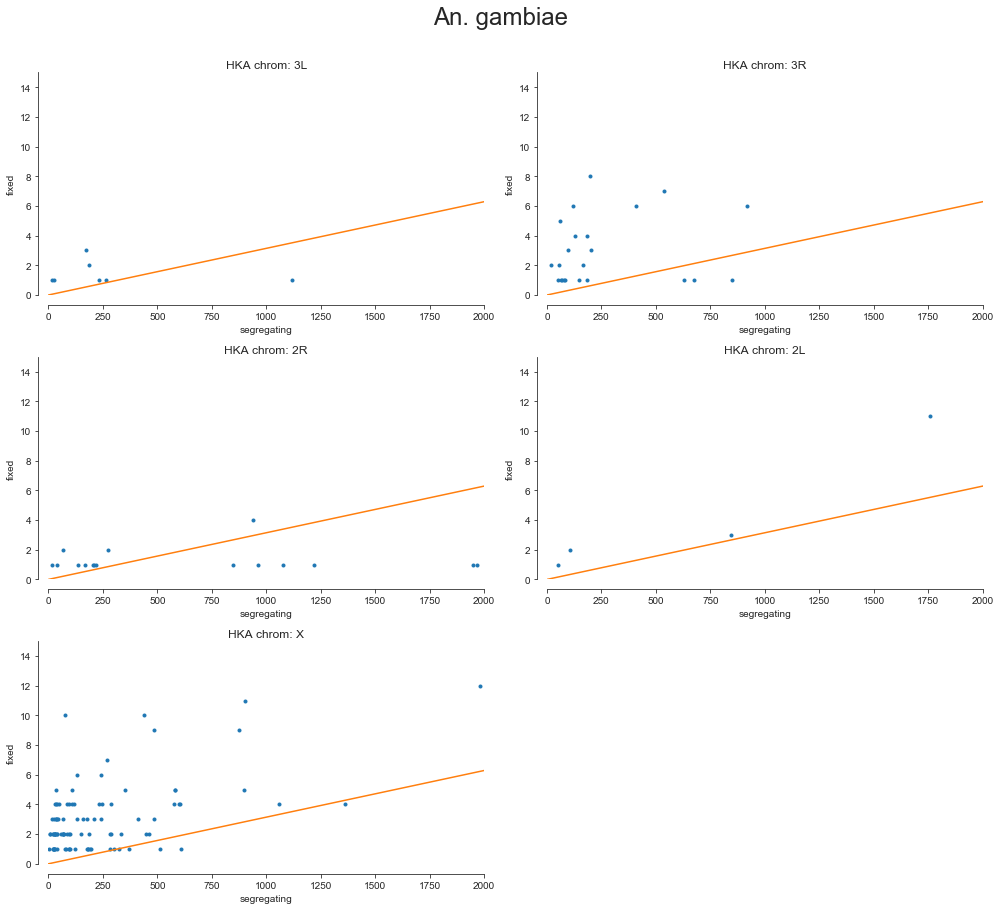

In [138]:
fig = plt.figure(figsize=(14, 12))
for num, chrom in enumerate(contigs):
    
    ax = plt.subplot(3,2,num+1)
    conti_tbl = get_conti(chrom, 'gambiae', joi_seg_fix_gambiae, B_geno_wide_gambiae, D_geno_wide_gambiae)
    segreg = [i[0][0] for i in conti_tbl.values()]
    fixed = [i[0][1] for i in conti_tbl.values()]
    ax.plot(segreg, fixed, '.')
    ax.plot([0, B_geno_wide_gambiae], [0, D_geno_wide_gambiae])
    ax.set_xlabel('segregating')
    ax.set_xlim(0,2000)
    ax.set_ylim(0,15)
    ax.set_title('HKA chrom: %s' % chrom)
    ax.set_ylabel('fixed')
    sns.set_style('ticks')
    sns.despine(offset=10)
fig.suptitle('An. gambiae', y=1.05, fontsize=24)
fig.tight_layout()

## Plot homogeneity test

In [139]:
# get just the gene matching gambiae coluzzii
joi_gambiae_coluzzii = {chrom: joi_seg_fix_coluzzii[chrom].join(joi_seg_fix_gambiae[chrom], key='genes') for chrom in contigs}

In [140]:
joi_gambiae_coluzzii['2L'].display()

genes,coluzzii_fixed,coluzzii_segreg,A/C (i.e.seg/fix),gambiae_fixed,gambiae_segreg,B/D (i.e.seg/fix)
AGAP004827,2,1101,550.5,3,845,281.6666666666667
AGAP004902,6,2250,375.0,11,1757,159.72727272727272
AGAP005073,4,162,40.5,2,104,52.0
AGAP005165,10,8321,832.1,5,7803,1560.6
AGAP006634,2,14439,7219.5,1,19773,19773.0


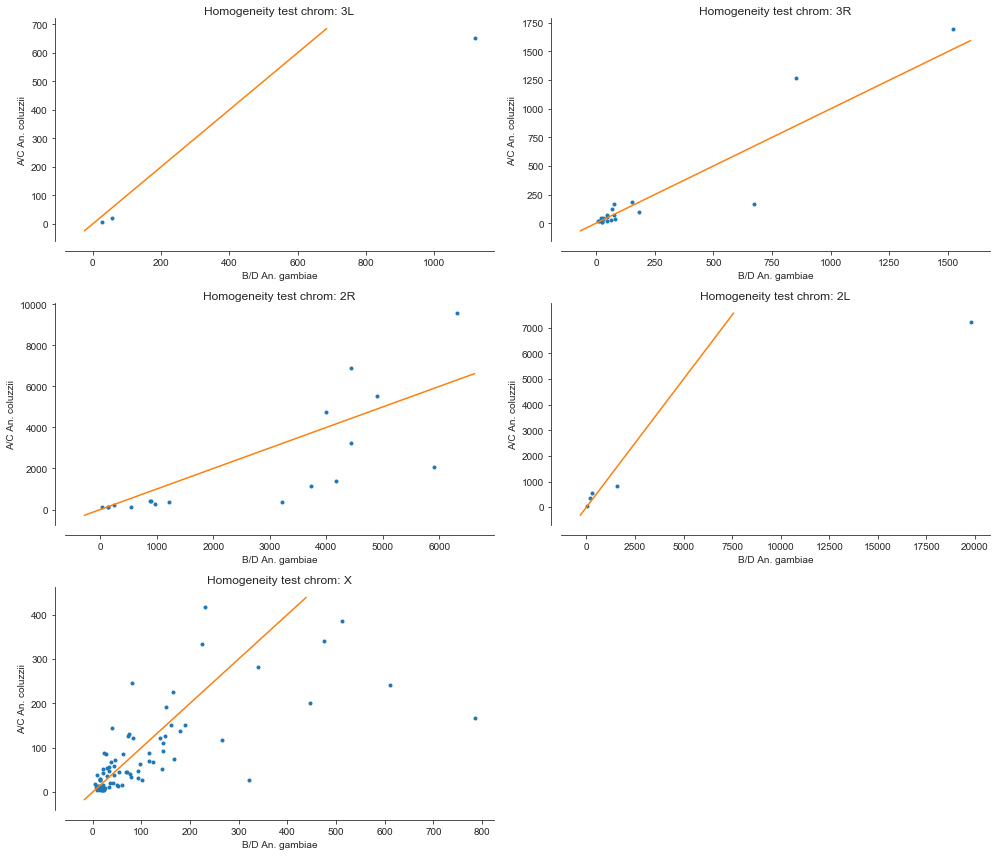

In [141]:
fig = plt.figure(figsize=(14, 12))
for num, chrom in enumerate(contigs):
    
    ax = plt.subplot(3,2,num+1)
    
    AC = joi_gambiae_coluzzii[chrom]['A/C (i.e.seg/fix)'].list()
    BD = joi_gambiae_coluzzii[chrom]['B/D (i.e.seg/fix)'].list()
    fixed = [i[0][1] for i in conti_tbl.values()]
    ax.plot(BD, AC, '.')
    lim = max(ax.get_xlim(), ax.get_ylim())
    ax.plot(lim, lim)
    #ax.set_xlim(0,2000)
    #ax.set_ylim(0,2000)
    ax.set_title('Homogeneity test chrom: %s' % chrom)
    ax.set_ylabel('A/C An. coluzzii')
    ax.set_xlabel('B/D An. gambiae')
    sns.set_style('ticks')
    sns.despine(offset=10)

fig.tight_layout()

## Homogeneity test

In [142]:
joi_gambiae_coluzzii[chrom]

genes,coluzzii_fixed,coluzzii_segreg,A/C (i.e.seg/fix),gambiae_fixed,gambiae_segreg,B/D (i.e.seg/fix)
AGAP000819,4,18,4.5,2,38,19.0
AGAP000829,5,134,26.8,1,322,322.0
AGAP000832,1,40,40.0,1,77,77.0
AGAP000833,5,81,16.2,3,179,59.666666666666664
AGAP000835,1,68,68.0,1,123,123.0


In [143]:
def perform_homogen(joi_g_c):
    conti_tbl = {}
    pear_chi = {}
    for chrom in contigs:
        conti_tbl[chrom] = {}
        pear_chi[chrom] = {}
        for rec in joi_g_c[chrom].records():

            A = rec.coluzzii_segreg
            C = rec.coluzzii_fixed
            B = rec.gambiae_segreg
            D = rec.gambiae_fixed
            gene = rec.genes
            conti_tbl[chrom][gene] = [[A, B], [C, D]]
        for k in conti_tbl[chrom]:
            pear_chi[chrom][k] = scipy.stats.chi2_contingency(conti_tbl[chrom][k])
    return pear_chi

In [144]:
pear_chi_homogen = perform_homogen(joi_gambiae_coluzzii)

In [145]:
with open('/home/randomx/hka/homogen_test/homogeneity_summary_beta.tab', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter='\t')
    header = ['chrom', 'gene','score']
    writer.writerow(header)
    for chrom in contigs:
        for gene, value in pear_chi_homogen[chrom].items():
            row = [chrom, gene, -(np.log10((value[1])))]
            writer.writerow(row)


In [146]:
homog_tbl = (etl.fromtsv('/home/randomx/hka/homogen_test/homogeneity_summary_beta.tab', delimiter='\t')
             .convert('score', float)
             #.select(lambda r: r.score >= 1)
             .sort(['chrom', 'score'], reverse=True)
             )
homog_tbl.displayall()

chrom,gene,score
X,AGAP000847,2.03942723481
X,AGAP001035,1.97067066779
X,AGAP000829,1.80250762781
X,AGAP000981,1.05153076125
X,AGAP000833,0.862572362616
X,AGAP000998,0.825105959951
X,AGAP001023,0.681353561134
X,AGAP000819,0.660786371453
X,AGAP001037,0.495242354538
X,AGAP013341,0.487233375308


In [147]:
join_hom_direct = homog_tbl.join(disr_select, key='gene')
join_hom_direct.displayall()

chrom,gene,score,chrom,segreg_c,pri_der_fix_c,score_c,segreg_g,pri_der_fix_g,score_g,score_tot
X,AGAP001026,0.0911342988974,X,32,5,31.7591254698,39,4,19.2554122217,51.014537691499996
X,AGAP001035,1.97067066779,X,67,13,110.786262569,109,5,11.3266754184,122.1129379874
X,AGAP001076,0.295311757658,X,119,10,38.4766077275,78,10,67.4529169256,105.9295246531
2L,AGAP006634,0.105348743521,2L,14439,2,11.2952008169,19773,1,13.7886692343,25.0838700512
3R,AGAP007731,0.397181553582,3R,146,10,31.314540398,197,8,16.7709893075,48.085529705499994
3R,AGAP007732,0.0124927964829,3R,525,25,54.3486933436,633,31,81.7214281888,136.0701215324
3R,AGAP007736,0.757048910916,3R,1966,29,13.9424575794,2299,48,45.3891959405,59.3316535199
X,AGAP013341,0.487233375308,X,37,10,110.595539115,33,4,22.4765841881,133.0721233031


---------------------------

## Homogen selection coluzzii: (C/A > D/B)

In [148]:
for chrom in contigs:
    joi_gambiae_coluzzii[chrom] = joi_gambiae_coluzzii[chrom].addfield('chrom', chrom)


In [149]:
joi_g_c_genome = etl.cat(*joi_gambiae_coluzzii.values())
joi_g_c_genome.display()

genes,coluzzii_fixed,coluzzii_segreg,A/C (i.e.seg/fix),gambiae_fixed,gambiae_segreg,B/D (i.e.seg/fix),chrom
AGAP010313,5,112,22.4,3,173,57.666666666666664,3L
AGAP010317,4,31,7.75,1,27,27.0,3L
AGAP010788,2,1306,653.0,1,1119,1119.0,3L
AGAP001674,6,2322,387.0,1,3209,3209.0,2R
AGAP001683,31,13434,433.35483870967744,19,17157,903.0,2R


In [150]:
homogen_select_coluzzii = (joi_g_c_genome.addfield('C/A', lambda r: r.coluzzii_fixed / r.coluzzii_segreg)
                     .addfield('D/B', lambda r: r.gambiae_fixed / r.gambiae_segreg)
                     .select(lambda r: r['C/A'] > r['D/B'])
                     .rename('genes', 'gene')
                     .join(homog_tbl, key=['gene', 'chrom'])
                     .cut(0,7,-1)
                     .sort('score', reverse=True)
                     )
homogen_select_coluzzii.displayall()

gene,chrom,score
AGAP003997,2R,2.70591011582
AGAP000847,X,2.03942723481
AGAP001035,X,1.97067066779
AGAP001683,2R,1.82333404602
AGAP000829,X,1.80250762781
AGAP001674,2R,1.30052052747
AGAP001824,2R,1.27508310059
AGAP000981,X,1.05153076125
AGAP000833,X,0.862572362616
AGAP000998,X,0.825105959951


## Homogen selection gambiae: (C/A < D/B)

In [151]:
homogen_select_gambiae = (joi_g_c_genome.addfield('C/A', lambda r: r.coluzzii_fixed / r.coluzzii_segreg)
                     .addfield('D/B', lambda r: r.gambiae_fixed / r.gambiae_segreg)
                     .select(lambda r: r['D/B'] > r['C/A'])
                     .rename('genes', 'gene')
                     .join(homog_tbl, key=['gene', 'chrom'])
                     .cut(0,7,-1)
                     .sort('score', reverse=True)
                     )
homogen_select_gambiae.displayall()

gene,chrom,score
AGAP004902,2L,0.8609160745
AGAP007736,3R,0.757048910916
AGAP001023,X,0.681353561134
AGAP001083,X,0.412862666118
AGAP000837,X,0.411513322782
AGAP010295,3R,0.397855756368
AGAP001068,X,0.358725441804
AGAP001091,X,0.32021569939
AGAP001076,X,0.295311757658
AGAP001053,X,0.275294859436


## Plot the distribution of the homogen test for the top 20 genes (all genes allowed)


In [152]:
homogen_select_gambiae.rowlengths()

length,count
3,51


In [153]:
homogen_select_coluzzii.rowlengths()

length,count
3,79


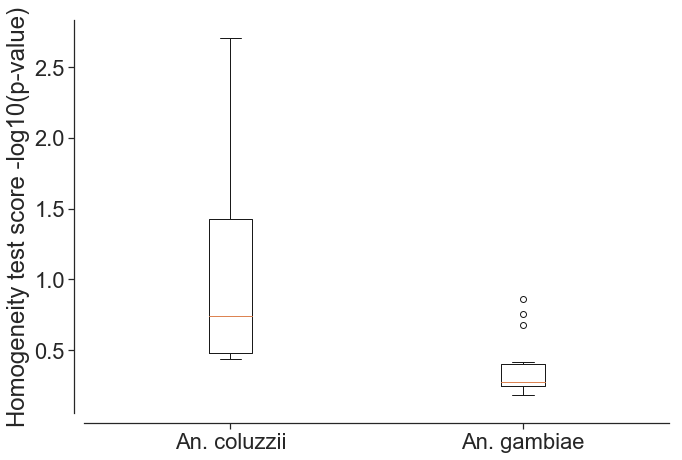

In [169]:
fig, ax = plt.subplots(figsize=(10,7))
gambiae_hom = homogen_select_gambiae['score'].list()[:20]
coluzzii_hom  = homogen_select_coluzzii['score'].list()[:20]
ax.boxplot([coluzzii_hom, gambiae_hom])
ax.set_xticklabels(['An. coluzzii', 'An. gambiae'])
ax.set_ylabel('Homogeneity test score -log10(p-value)')
sns.set(style ='ticks',font_scale=2)
sns.despine(offset=10)

fig.tight_layout()
#plt.savefig('/home/randomx/hka/homogen_test/distribution_top20_allgenes_v2.png', dpi=500)

<i>An.coluzzii</i> evolve rapidly and being under strong positive selction following the divergence from <i>An.gambiae</i>

## Plot the distribution of the homogen test genes under private selection

In [170]:
priv_sel_gambiae

chrom,gene,segreg_c,pri_der_fix_c,score_c,segreg_g,pri_der_fix_g,score_g
X,AGAP000975,None,None,0,34,5,35.0817572797
X,AGAP001041,18,1,0.994879324639,17,3,21.64108628
X,AGAP001051,None,None,0,7,2,17.7271161896
X,AGAP000949,None,None,0,47,4,16.1348914193
X,AGAP001083,38,1,0.466121033299,25,3,15.3932646501


In [171]:
private_hom_gambiae = homogen_select_gambiae.join(priv_sel_gambiae, key='gene').sort('score', reverse=True)
private_hom_gambiae.rowlengths()

length,count
10,24


In [172]:
private_hom_coluzzii = homogen_select_coluzzii.join(priv_sel_coluzzii, key='gene').sort('score', reverse=True)
private_hom_coluzzii.rowlengths()

length,count
10,18


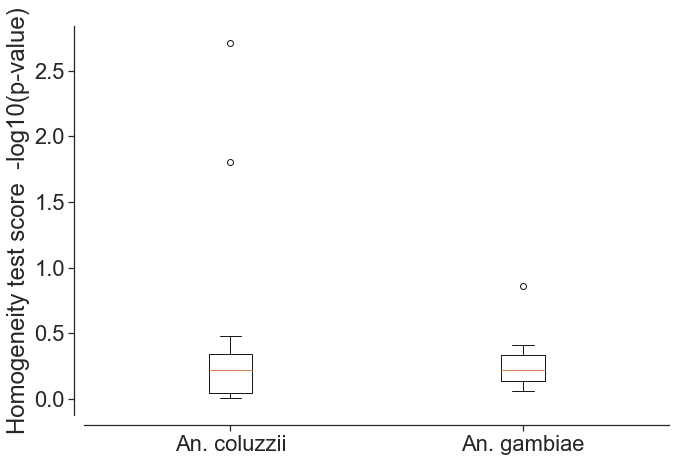

In [173]:
fig, ax = plt.subplots(figsize=(10,7))
gambiae_hom = private_hom_gambiae['score'].list()[:18]
coluzzii_hom  = private_hom_coluzzii['score'].list()
ax.boxplot([coluzzii_hom, gambiae_hom])
#sns.boxplot([coluzzii_hom, gambiae_hom], ax=ax)
ax.set_xticklabels(['An. coluzzii', 'An. gambiae'])
ax.set_ylabel('Homogeneity test score  -log10(p-value)')
sns.set(style ='ticks',font_scale=2)
sns.despine(offset=10)
fig.tight_layout()
#plt.savefig('/home/randomx/hka/homogen_test/distribution_top11_private_selec_v2.png', dpi=500)

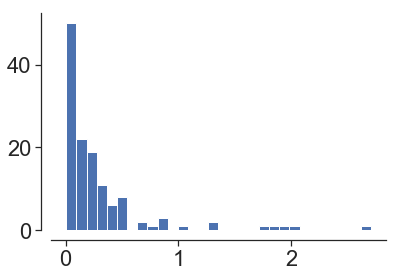

In [174]:
#plot homog score distribution
fig, ax = plt.subplots()
x = [float(i) for i in homog_tbl['score'].list()]
val = ax.hist(x, bins=30)
sns.despine(offset=10)